In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [3]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
train, test = train_test_split(data, test_size=0.30)
data.describe()

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_LINGUA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Renda_Mensal,Renda_per_capta,Computador_por_pessoa,Celulares_por_pessoa
count,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06
mean,1.038642e-03,-1.379273e-04,-2.337789e-03,3.386821e-06,-2.425244e-02,-9.367279e-04,1.952823e-03,8.082849e-05,-1.779899e-02,-7.818498e-03,-2.259718e-02,-4.885861e-02,8.362171e+02,2.075064e-01,6.735228e-01
std,2.667147e-01,1.659481e-01,3.946580e-01,5.908589e-02,4.916430e-01,4.703076e-01,3.811280e-01,4.039205e-02,6.772674e-01,6.503605e-01,7.001105e-01,9.171282e-01,1.254462e+03,2.534051e-01,3.109964e-01
min,-4.055080e-01,-1.988856e-01,-5.230838e-01,-8.809104e-02,-1.824682e+00,-4.971218e-01,-4.146910e-01,-1.584228e-02,-1.707128e+00,-1.265097e+00,-1.819720e+00,-2.971101e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.623837e-01,-1.988856e-01,-5.230838e-01,-4.679373e-02,9.853229e-03,-4.971218e-01,-3.420107e-01,-1.584228e-02,-3.922961e-01,-2.124262e-01,-3.415952e-02,-6.658565e-01,2.994000e+02,0.000000e+00,5.000000e-01
50%,-1.845375e-02,1.384236e-01,2.793551e-01,2.340675e-02,9.853229e-03,4.448430e-01,-1.470738e-02,6.392830e-03,2.036856e-01,-2.124262e-01,2.120150e-01,3.122772e-01,4.990000e+02,2.000000e-01,6.666667e-01
75%,1.669237e-01,1.384236e-01,2.793551e-01,2.340675e-02,2.792401e-01,4.448430e-01,3.108230e-01,6.392830e-03,5.818676e-01,3.761003e-01,2.873361e-01,8.320185e-01,8.316667e+02,3.333333e-01,1.000000e+00
max,1.945867e+00,1.384236e-01,9.992840e-01,1.309356e-01,2.792401e-01,4.448430e-01,7.673745e-01,6.757275e-01,1.107397e+00,1.249667e+00,8.045838e-01,1.098417e+00,3.000000e+04,4.000000e+00,4.000000e+00


## Finding the best model

### XGBoost

Precision: 70.43%
Recall: 74.43%


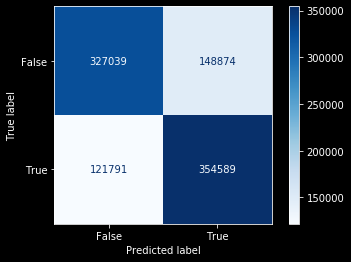

In [4]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)

print("Precision: " + str(precision) + "%")
print("Recall: " + str(recall) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues,
                      values_format = "d")

### Decision Tree Classifier

Precision: 62.25000000000001%
Recall: 60.56%


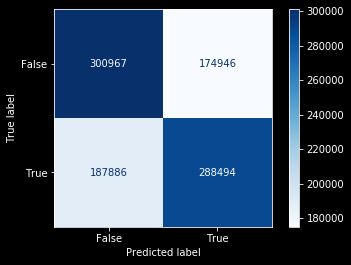

In [5]:
model = DecisionTreeClassifier().fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Random Forest Classifier

Precision: 68.15%
Recall: 70.25%


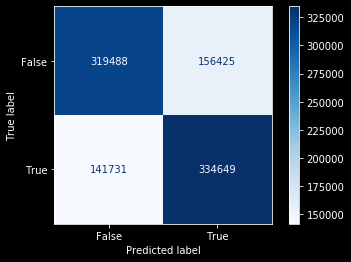

In [7]:
model = RandomForestClassifier().fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Storing the predictions for entire dataset

In [ ]:
predictions = model.predict(data.drop(["DESEMPENHO_BAIXO"], 1))
data["Previsao"] = predictions

def mapea_acertou(data):
    if data["Previsao"] == 0 and data["DESEMPENHO_BAIXO"] == 0: return 1
    if data["Previsao"] == 1 and data["DESEMPENHO_BAIXO"] == 1: return 1
    else: return 0

data["Acertou"] = data.apply(mapea_acertou, 1)

## Saving data

In [ ]:
data.to_csv("../dataset/dataset_4.csv", sep = ";")